In [ ]:
# PART 1

# downloading packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

# downloading clean dataset
# importing the dataset
clean_smoking = pd.read_csv("C:/Users/justi/Introduction-to-Python-S1-M1/Python-Introduction-Smoking-Prevalence/data/clean/clean_smoking_df.csv")
clean_educ =pd.read_csv("C:/Users/justi/Introduction-to-Python-S1-M1/Python-Introduction-Smoking-Prevalence/data/clean/clean_educ_df.csv")
clean_smoking.head()


In [ ]:
# PART 2:regression of smoking prevalence on sex

# preparing data

clean_smoking.head()
clean_smoking.isnull().sum()
clean_smoking.head()

In [ ]:
# subset sex variable

clean_smoking['sex_binary'] = clean_smoking['sex'].map({'Females': 0,
                                                        'Males': 1})
clean_smoking['sex_binary'] = pd.to_numeric(clean_smoking['sex_binary'],errors='coerce')
clean_smoking.head()


In [ ]:
# set the variables

X = clean_smoking[['sex_binary']]  # independent variable(s)
y = clean_smoking['obs_value']   # dependent variable
print(X)


In [ ]:
# Create and fit the model

model = LinearRegression()
model.fit(X, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [80]:
# Display the model parameters
print(f"Intercept (β₀): {model.intercept_:.2f}")
print(f"Coefficient (β₁): {model.coef_[0]:.2f}")


Intercept (β₀): 20.00
Coefficient (β₁): 9.54


In [110]:
#PART 3: the scatter plot

# preparing the dataset
filtered_clean_smoking=clean_smoking[clean_smoking["time_period"]==2023]
plot= (filtered_clean_smoking.groupby(["geo","sex_binary"])["obs_value"].mean().reset_index())
plot= plot.pivot(index="geo", columns="sex_binary", values="obs_value")
name_country = len(plot)
colors = plt.cm.tab20(np.linspace(0, 1, name_country))


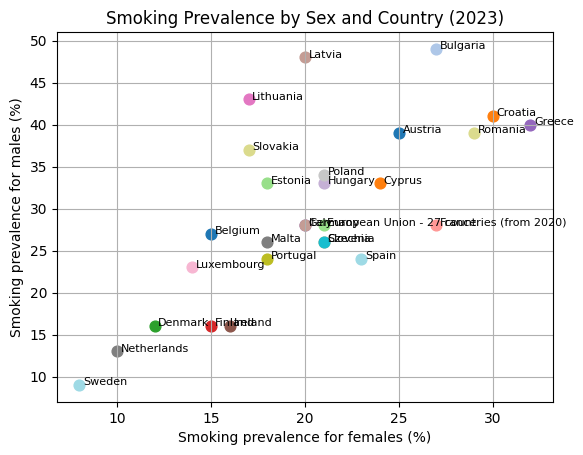

In [117]:
# doing the graph
for i, geo in enumerate(plot.index):
    plt.scatter(plot.loc[geo, 0], plot.loc[geo, 1],
                color=colors[i], s=60)
    plt.text(plot.loc[geo, 0]+0.2, plot.loc[geo, 1], geo, fontsize=8)
plt.xlabel("Smoking prevalence for females (%)")
plt.ylabel("Smoking prevalence for males (%)")
plt.title("Smoking Prevalence by Sex and Country (2023)")
plt.grid(True)
